In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import numpy as np
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
#ante_natal_care_df = pd.read_csv("csv/HealthData-Nilgiris-AnteNatal-2014-2015.csv")
family_planning_df = pd.read_csv("csv/HealthData-Nilgiris-FamilyPlanning-2014-2015.csv")
family_planning_ch_df = pd.read_csv("csv/HealthData-Chennai-FamilyPlanning-2014-2015.csv")

In [4]:
family_planning_df.columns

Index([u'Parameters', u'Type', u'Total Facility', u'April 13-14',
       u'April 14-15', u'Difference-April 14-15-April 13-14',
       u'Total Reported Facility', u'May 13-14', u'May 14-15',
       u'Difference-May 14-15-May 13-14', u'Total Reported Facility.1',
       u'June 13-14', u'June 14-15', u'Difference-June 14-15-June 13-14',
       u'Total Reported Facility.2', u'July 13-14', u'July 14-15',
       u'Difference-July 14-15-July 13-14', u'Total Reported Facility.3',
       u'August 13-14', u'August 14-15',
       u'Difference-August 14-15-August 13-14', u'Total Reported Facility.4',
       u'September 13-14', u'September 14-15',
       u'Difference-September 14-15-September 13-14',
       u'Total Reported Facility.5', u'October 13-14', u'October 14-15',
       u'Difference-October 14-15-October 13-14', u'Total Reported Facility.6',
       u'November 13-14', u'November 14-15',
       u'Difference-November 14-15-November 13-14',
       u'Total Reported Facility.7', u'December 13-1

In [5]:
df = family_planning_df.filter(regex=("Difference"))

In [6]:
family_planning_subset_df = family_planning_df.select(lambda col: not col.startswith('Total') and not col.startswith('Difference') \
                          and not col.startswith('Type'),axis=1 )
family_planning_ch_subset_df = family_planning_ch_df.select(lambda col: not col.startswith('Total') and not col.startswith('Difference') \
                          and not col.startswith('Type'),axis=1 )

In [7]:
months = {'January':'Jan',
          'February':'Feb',
          'March':'Mar',
          'April':'Apr',
          'May':'May',
          'June':'Jun',
          'July':'Jul',
          'August':'Aug',
          'September':'Sep',
          'October':'Oct',
          'November':'Nov',
          'December':'Dec'}


In [8]:
def get_date_from_column_name(name):
    month_present = name.split(" ")
    year = month_present[1].split("-")
    date_string = months[month_present[0]]+" "+year[0]
    return datetime.strptime(date_string,"%b %y")

In [9]:
def from_datetime_get_month_and_year(date):

    return str(date.month)+"-"+str(date.year)

In [10]:
def sort_df_on_time(df):
    columns = {}

    for name in (df.keys()[1:]):
        columns[get_date_from_column_name(name)] = name
    
    dates = columns.keys()
    dates.sort()
    
    new_df = pd.DataFrame()
    new_df[df.columns[0]] = df[df.columns[0]]
    for date in dates:
        column_name = columns[date]
        new_df[from_datetime_get_month_and_year(date)] = df[column_name]
    
    return new_df   

In [11]:
sorted_nl_df = sort_df_on_time(family_planning_subset_df)
sorted_nl_df = sorted_nl_df.fillna(axis=1,method='backfill')
sorted_ch_df = sort_df_on_time(family_planning_ch_subset_df)
sorted_ch_df = sorted_ch_df.fillna(axis=1,method='backfill')


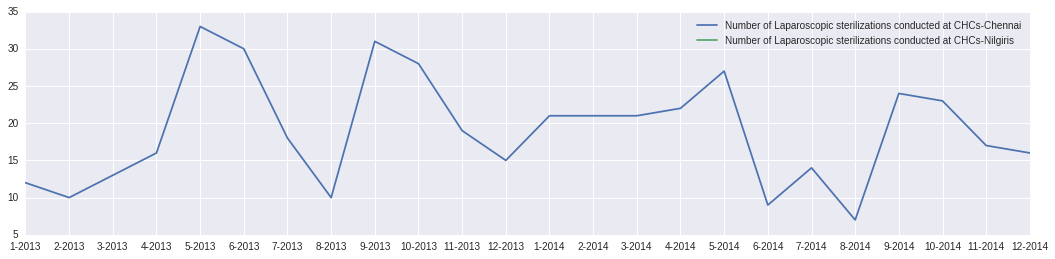

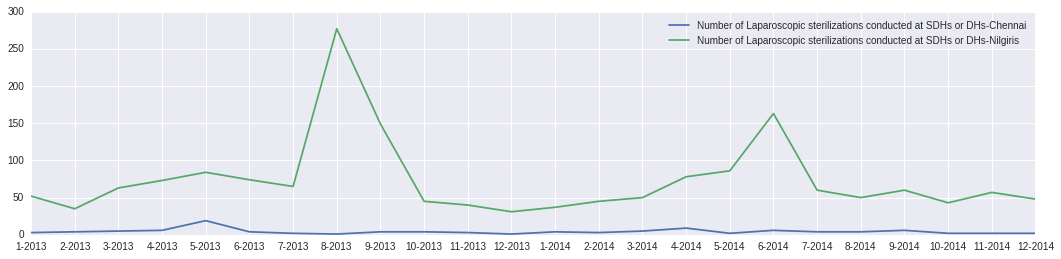

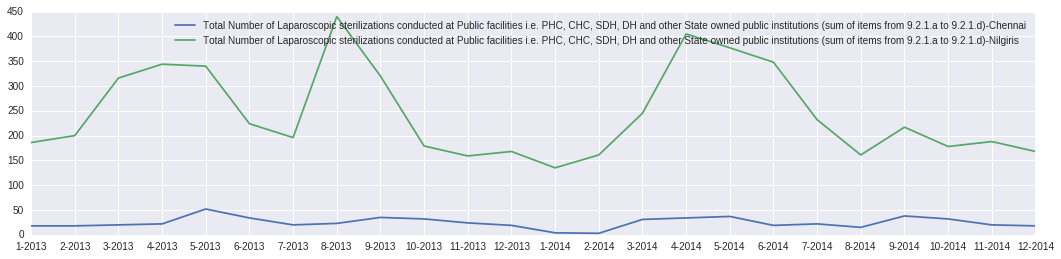

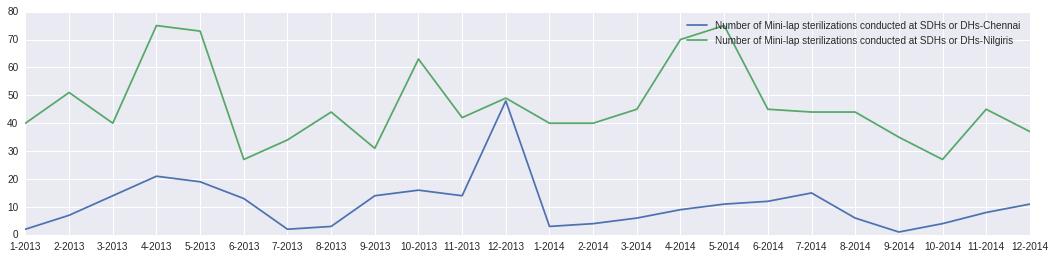

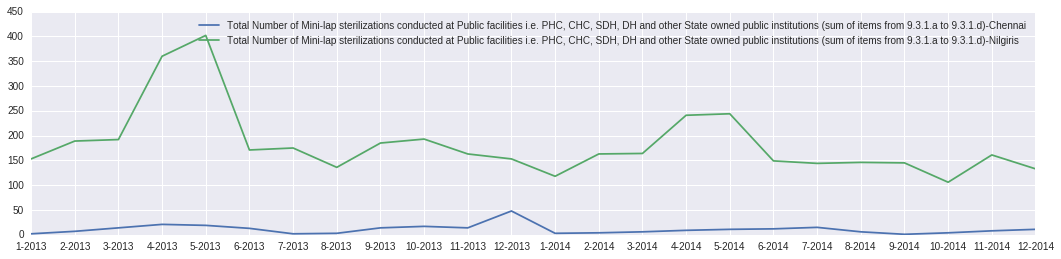

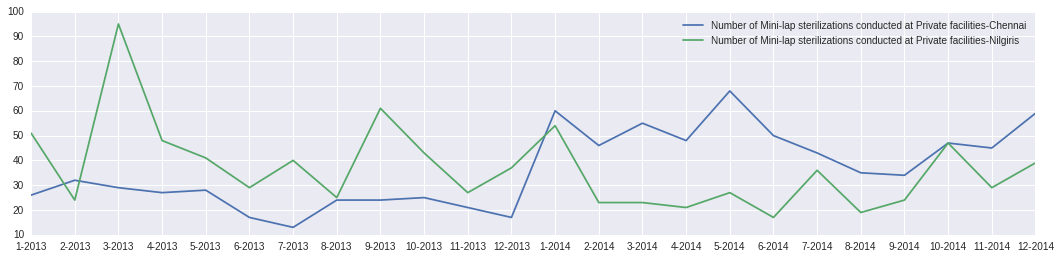

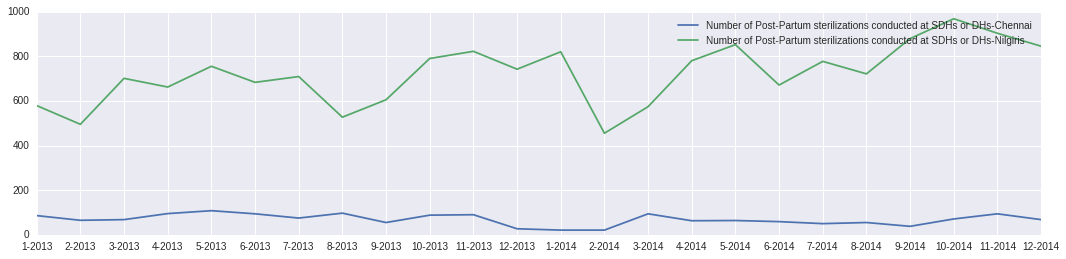

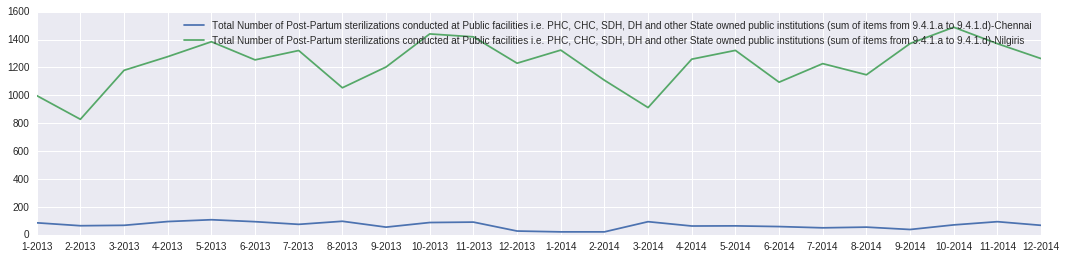

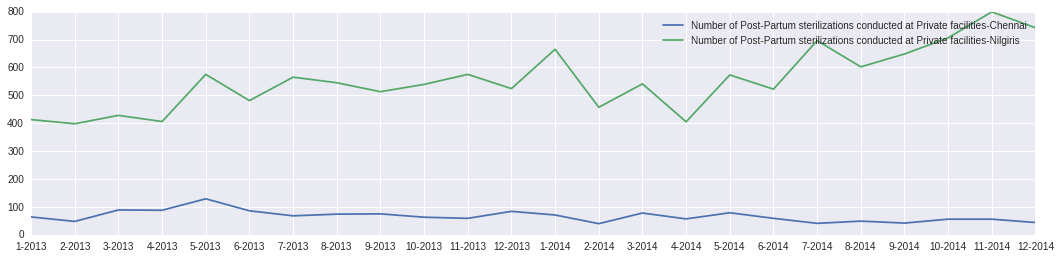

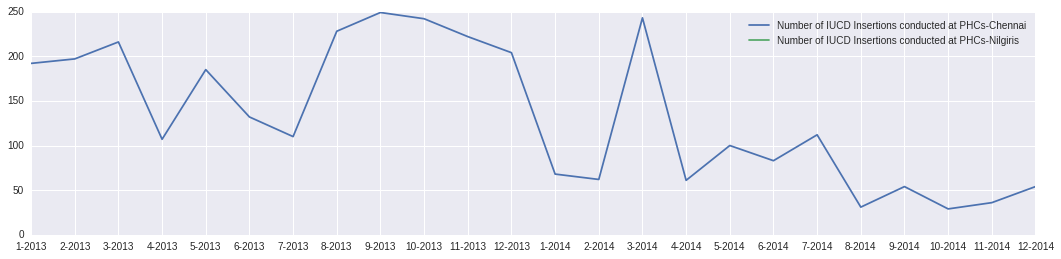

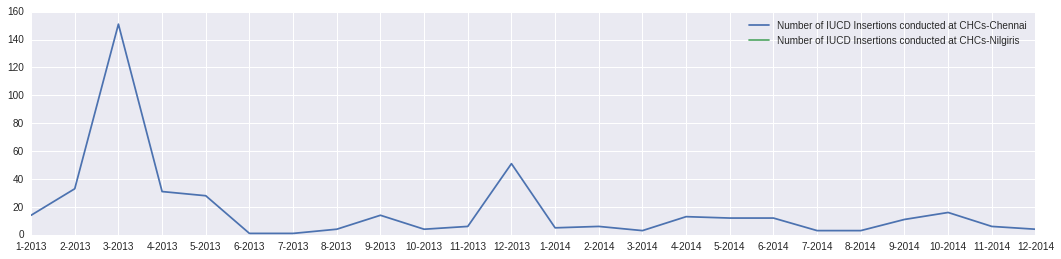

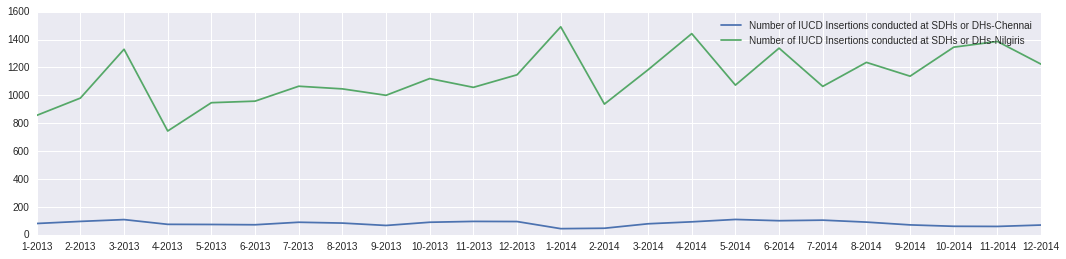

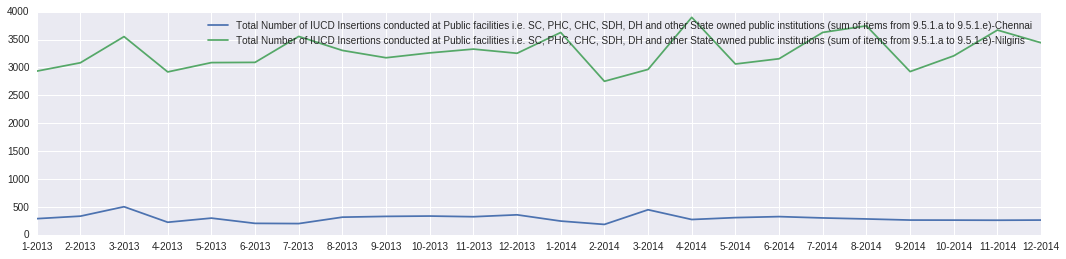

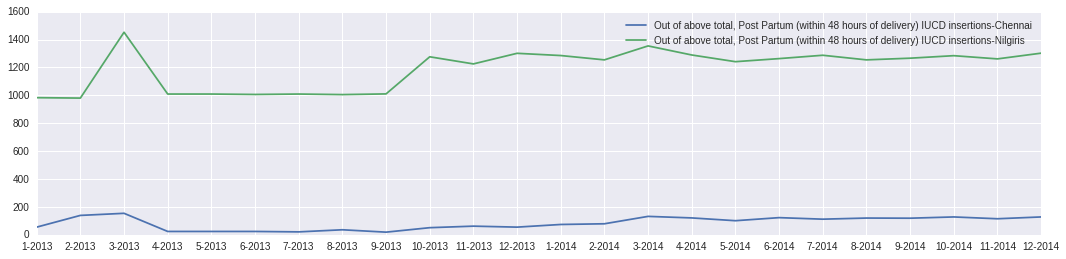

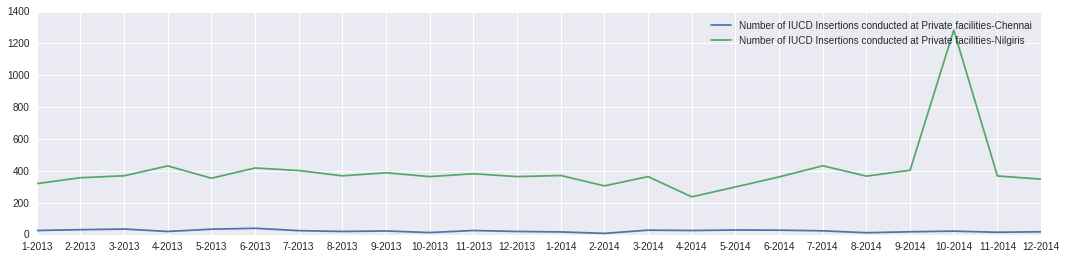

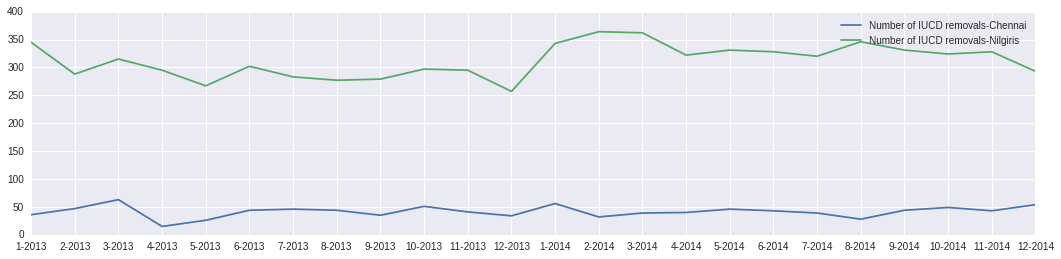

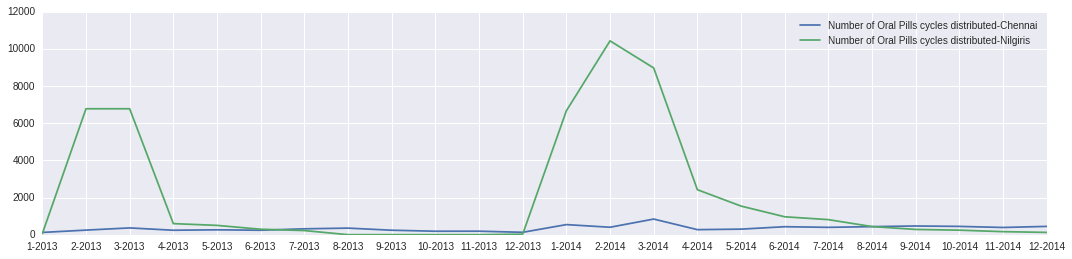

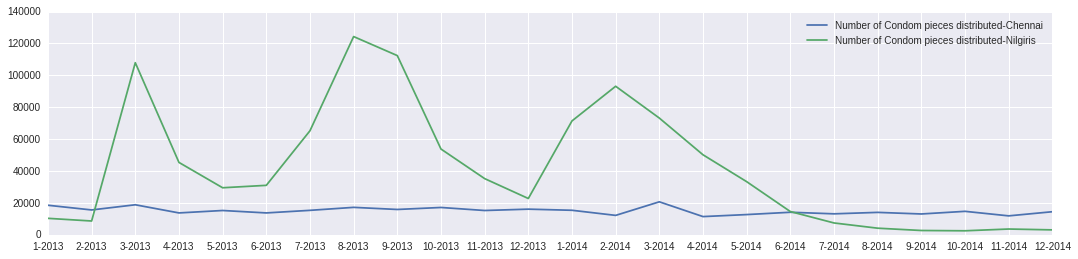

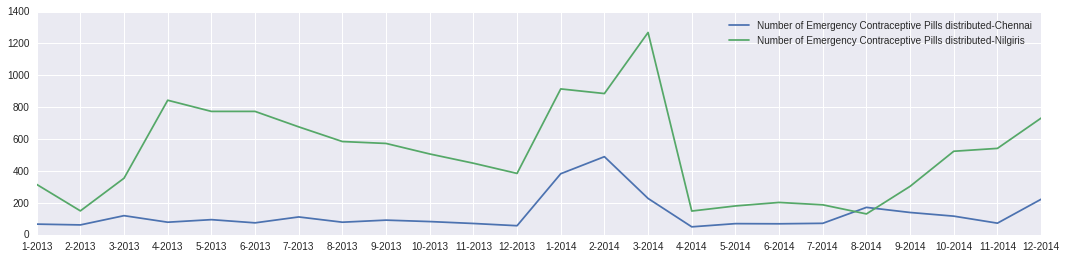

In [12]:

#for k,v in sorted_ch_df.iterrows() and m,n in sorted_df.iterrows():
for i in range(0,sorted_ch_df.shape[0]):
    v = sorted_ch_df.iloc[i]
    n = sorted_nl_df.iloc[i]
    plt.figure(figsize=(18,4))
    plt.xticks(range(0,(len(sorted_ch_df.columns)-1)),v.index[1:])
    # plt.plot(v.values[1:],'bo')
    # plt.plot(n.values[1:],'ro')
    plt.plot(n.values[1:])
    plt.plot(v.values[1:])
    plt.legend([v.values[0]+"-Chennai",n.values[0]+"-Nilgiris"])

In [13]:
correlation_for_indicator = {}
for i in range(0,sorted_ch_df.shape[0]):
    
    v = sorted_ch_df.iloc[i]
    n = sorted_nl_df.iloc[i]
    
    print type(n)
    
    v_values = v.fillna(method='backfill')
    n_values = n.fillna(method='backfill')
    print v_values,n_values
    print np.corrcoef(v_values[1:], n_values[1:])[0, 1]
    correlation = stats.pearsonr(v.values[1:],n.values[1:])
    #print v.values[0],correlation[0],correlation[1]
    correlation_for_indicator[v.values[0]] = correlation[0]/correlation[1]

<class 'pandas.core.series.Series'>
Parameters    Number of Laparoscopic sterilizations conducte...
1-2013                                                      NaN
2-2013                                                      NaN
3-2013                                                      NaN
4-2013                                                      NaN
5-2013                                                      NaN
6-2013                                                      NaN
7-2013                                                      NaN
8-2013                                                      NaN
9-2013                                                      NaN
10-2013                                                     NaN
11-2013                                                     NaN
12-2013                                                     NaN
1-2014                                                      NaN
2-2014                                                      NaN
3-20

AttributeError: sqrt

In [ ]:
correlation_for_indicator